In [2]:
pip install tensorflow opencv-python numpy pandas matplotlib seaborn ultralytics

  Using cached tensorflow-2.18.0-cp39-cp39-win_amd64.whl.metadata (3.3 kB)

  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
Using cached tensorflow-2.18.0-cp39-cp39-win_amd64.whl (7.5 kB)
Using cached keras-3.9.0-py3-none-any.whl (1.3 MB)


In [3]:
!pip install ultralytics

In [4]:
!rm -rf /kaggle/working/*

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import os

# Your dataset path
dataset_path = r"C:\Users\HP\OneDrive\Desktop\PCB project\pcb-defect-dataset"  # Use raw string (r"...")

# Create the data.yaml path
data_yaml_path = os.path.join(dataset_path, "data.yaml")

# Create the directory if it doesn't exist (just in case)
os.makedirs(os.path.dirname(data_yaml_path), exist_ok=True)

# Write the data.yaml file
with open(data_yaml_path, "w") as f:
    f.write(f"""path: {dataset_path}
train: train/images
val: val/images
test: test/images

names:
  0: mouse_bite
  1: spur
  2: missing_hole
  3: short
  4: open_circuit
  5: spurious_copper
""")

print(f"data.yaml file created at: {data_yaml_path}")

data.yaml file created at: C:\Users\HP\OneDrive\Desktop\PCB project\pcb-defect-dataset\data.yaml


In [7]:
import os

import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO
from ultralytics import settings

model = YOLO('yolov8s.pt')

model.info()

100%|█████████████████████████████████████████████████████████████████████████████| 21.5M/21.5M [00:07<00:00, 2.90MB/s]


YOLOv8s summary: 129 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs


(129, 11166560, 0, 28.816844800000002)

In [8]:
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

In [11]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # Load your desired model

results = model.train(
    data='PCB-DEFECT-DATASET/data.yaml',  # Relative path from current working directory
    epochs=5,
    batch=4,
    imgsz=640,
    name='pcb_defects_yolov8'
)

New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.85  Python-3.9.7 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=PCB-DEFECT-DATASET/data.yaml, epochs=5, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pcb_defects_yolov82, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning C:\Users\HP\OneDrive\Desktop\PCB project\pcb-defect-dataset\train\labels... 6370 images, 2164 backgroun


train: New cache created: C:\Users\HP\OneDrive\Desktop\PCB project\pcb-defect-dataset\train\labels.cache


val: Scanning C:\Users\HP\OneDrive\Desktop\PCB project\pcb-defect-dataset\val\labels... 802 images, 264 backgrounds, 0 


val: New cache created: C:\Users\HP\OneDrive\Desktop\PCB project\pcb-defect-dataset\val\labels.cache
Plotting labels to runs\detect\pcb_defects_yolov82\labels.jpg... 
"No such keys(s): 'mode.use_inf_as_null'"
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\pcb_defects_yolov82
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.188      4.002      1.358          1        640: 100%|██████████| 2134/2134 [3:38:04<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [07:

                   all       1066       1595      0.641       0.77      0.675      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G        1.9      1.606      1.215          2        640: 100%|██████████| 2134/2134 [3:48:32<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [05:

                   all       1066       1595      0.748      0.798      0.842      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.833      1.375      1.183          2        640: 100%|██████████| 2134/2134 [3:25:08<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [06:

                   all       1066       1595       0.88      0.911       0.93      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.781      1.231       1.16          1        640: 100%|██████████| 2134/2134 [2:37:00<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [16:

                   all       1066       1595      0.941       0.91      0.957      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.691      1.063      1.125          5        640: 100%|██████████| 2134/2134 [4:09:09<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [06:

                   all       1066       1595      0.945      0.948      0.961       0.49



5 epochs completed in 18.351 hours.
Optimizer stripped from runs\detect\pcb_defects_yolov82\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\pcb_defects_yolov82\weights\best.pt, 22.5MB

Validating runs\detect\pcb_defects_yolov82\weights\best.pt...
Ultralytics 8.3.85  Python-3.9.7 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [05:


                   all       1066       1595      0.945      0.949      0.961       0.49
            mouse_bite        140        280      0.926      0.964      0.936      0.485
                  spur        130        262      0.954      0.962      0.969       0.48
          missing_hole        118        229      0.958      0.996      0.994      0.557
                 short        158        327      0.934      0.914      0.938      0.464
          open_circuit        135        259      0.932      0.946      0.971      0.451
       spurious_copper        121        238      0.965      0.914      0.962      0.505
Speed: 2.1ms preprocess, 316.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\pcb_defects_yolov82


In [10]:
import os
print(os.getcwd())

C:\Users\HP\OneDrive\Desktop\PCB project


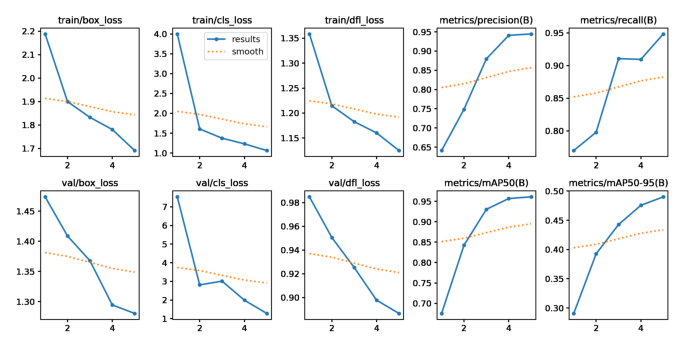

In [12]:
results_png = os.path.join(results.save_dir, 'results.png')

img = cv2.imread(results_png)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


0: 640x640 1 open_circuit, 882.6ms
Speed: 27.2ms preprocess, 882.6ms inference, 31.3ms postprocess per image at shape (1, 3, 640, 640)


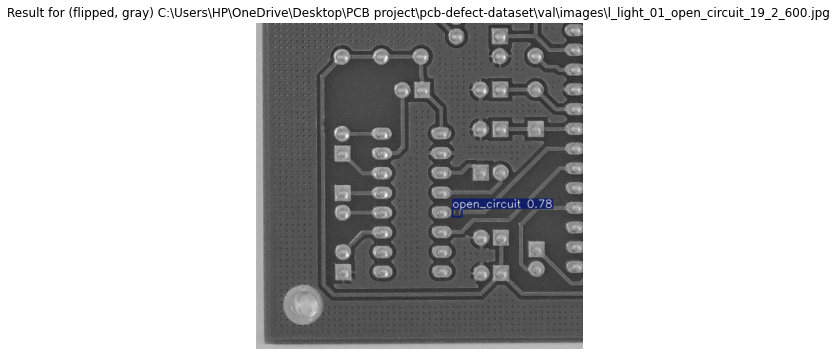


0: 640x640 (no detections), 536.4ms
Speed: 14.0ms preprocess, 536.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


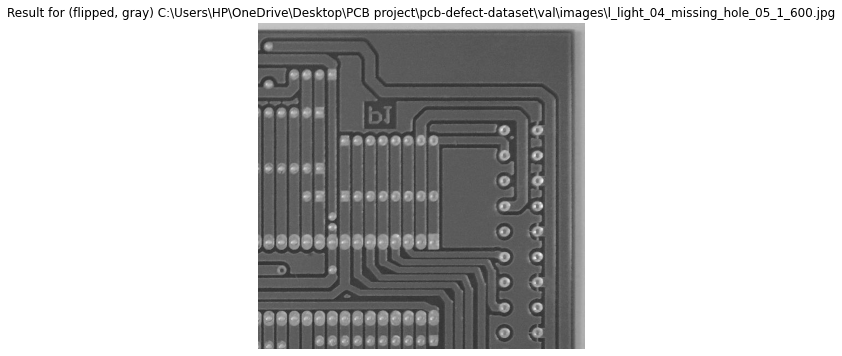


0: 640x640 1 short, 516.7ms
Speed: 9.9ms preprocess, 516.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


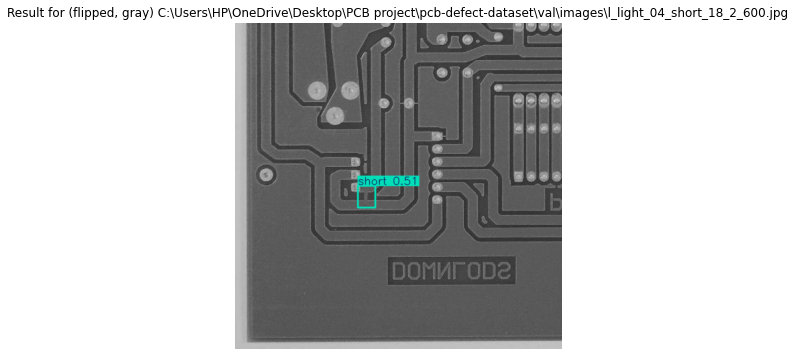

In [20]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

val_images = [
    "C:\\Users\\HP\\OneDrive\\Desktop\\PCB project\\pcb-defect-dataset\\val\\images\\l_light_01_open_circuit_19_2_600.jpg",
    "C:\\Users\\HP\\OneDrive\\Desktop\\PCB project\\pcb-defect-dataset\\val\\images\\l_light_04_missing_hole_05_1_600.jpg",
    "C:\\Users\\HP\\OneDrive\\Desktop\\PCB project\\pcb-defect-dataset\\val\\images\\l_light_04_short_18_2_600.jpg"
]

# Use the CORRECT path to best.pt
model_path = os.path.join("runs", "detect", "pcb_defects_yolov82", "weights", "best.pt")

if os.path.exists(model_path):
    model = YOLO(model_path)

    for image_path in val_images:
        if os.path.exists(image_path):
            img = cv2.imread(image_path)

            img_flipped = cv2.flip(img, 1)
            img_gray = cv2.cvtColor(img_flipped, cv2.COLOR_BGR2GRAY)

            img_gray_3ch = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

            results = model.predict(source=img_gray_3ch, conf=0.25)
            drawn_image = results[0].plot()

            drawn_image = cv2.cvtColor(drawn_image, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(8, 6))
            plt.imshow(drawn_image)
            plt.title(f"Result for (flipped, gray) {image_path}")
            plt.axis("off")
            plt.show()
        else:
            print(f"Error: Image not found at: {image_path}")
else:
    print(f"Error: Model not found at: {model_path}")